In [36]:
# Desafio proposto pelo grupo Mulheres em Dados
# Top 50 Spotify Songs - 2019
# LINK: https://www.kaggle.com/leonardopena/top50spotify2019
# Análise de Dados | Machine Learning
# Elaborado por NATHALIA SANTIAGO

In [37]:
#Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Importando os data frames train e test
df = pd.read_csv('/content/top50.csv', sep=",",encoding='ISO-8859-1')

In [39]:
# Ver nomes das colunas
df.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [40]:
# Ver as primeiras linhas da tabela
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [41]:
# Informação sobre os dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [42]:
# Retirada da coluna 'Unnamed' pois só possui ids, não será utilizada na análise
df.drop('Unnamed: 0',axis=1,inplace=True)

In [43]:
# Verificar se há valores nulos - não tem
df.isnull().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [44]:
popular_songs = df.groupby('Genre')['Popularity'].count()
print(popular_songs)
# Agrupando vejo que as músicas mais populares são do gênero 'dance pop', seguido do 'pop' e 'latin'

Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
Name: Popularity, dtype: int64


In [45]:
popular_artist = df.groupby('Artist.Name')['Track.Name'].count()
print(popular_artist)
# Dessa forma, vemos que alguns artistas possuem mais de uma música nas mais tocadas:Ed Sheeran(4) e
# Diversos empatados em segundos lugar com duas músicas, por exemplo Ariana Grande, Billie Eilish, Lil Nas X

Artist.Name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
Name: Track.Name, dtype: int64


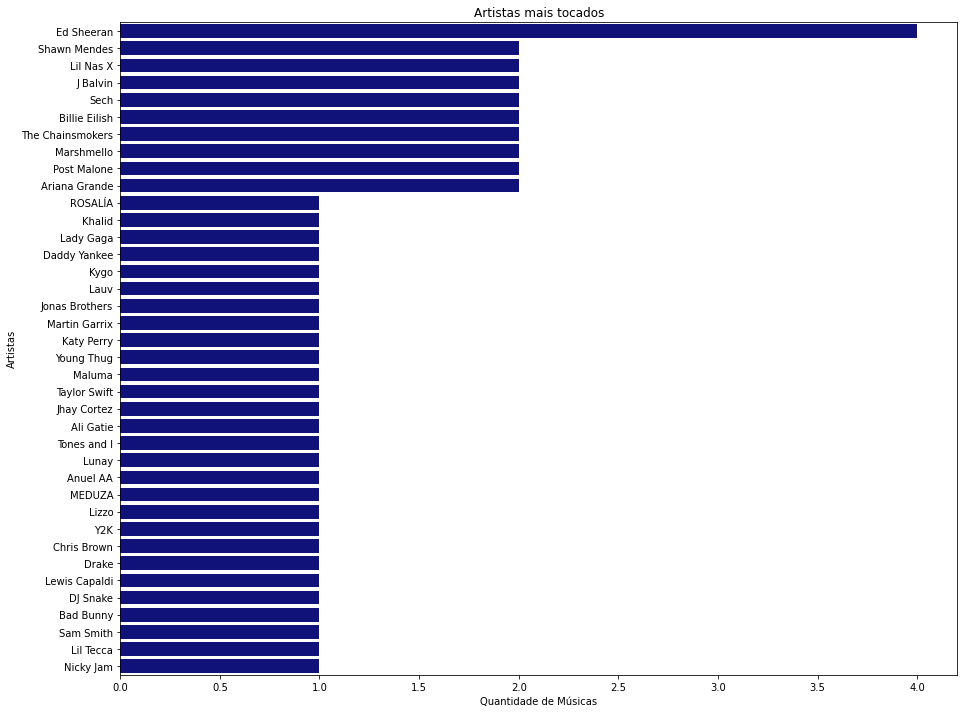

In [59]:
# Ilustrando a informação acima
plt.figure(figsize=(15,12))
ax = sns.countplot(y="Artist.Name",data=df,color='darkblue',
                   order = df['Artist.Name'].value_counts().index[:50])
ax.grid(False)
plt.title("Artistas mais tocados")
plt.xlabel('Quantidade de Músicas')
plt.ylabel('Artistas')
plt.show()

Text(0, 0.5, 'Qtde de Faixas')

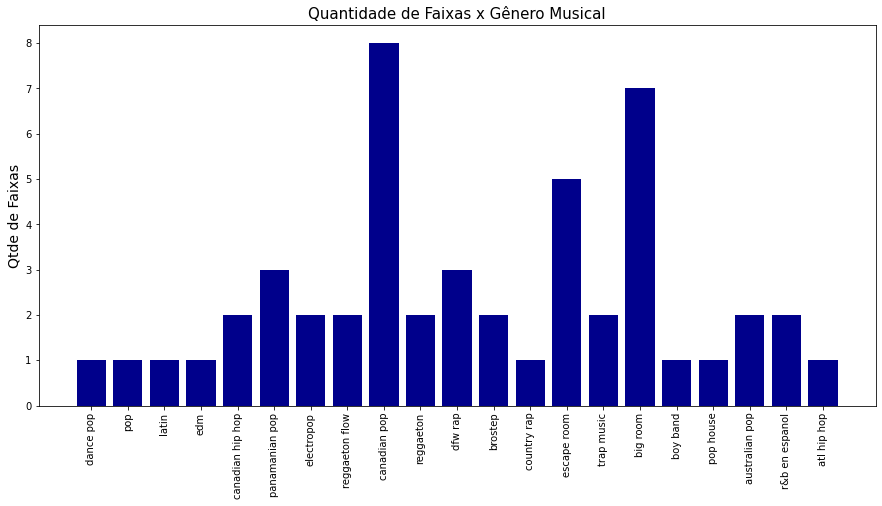

In [58]:
#Gráfico de barras com a quantidade de gênero x faixa de música
xtick = ['dance pop', 'pop', 'latin', 'edm', 'canadian hip hop',
'panamanian pop', 'electropop', 'reggaeton flow', 'canadian pop',
'reggaeton', 'dfw rap', 'brostep', 'country rap', 'escape room',
'trap music', 'big room', 'boy band', 'pop house', 'australian pop',
'r&b en espanol', 'atl hip hop']
length = np.arange(len(xtick))
genre_groupby = df.groupby('Genre')['Track.Name'].agg(len)
plt.figure(figsize=(15,7))
plt.bar(length, genre_groupby, color='darkblue')
plt.xticks(length, xtick)
plt.xticks(rotation=90)
plt.title("Quantidade de Faixas x Gênero Musical", fontsize=15)
plt.ylabel('Gênero', fontsize=20)
plt.ylabel('Qtde de Faixas', fontsize=14)

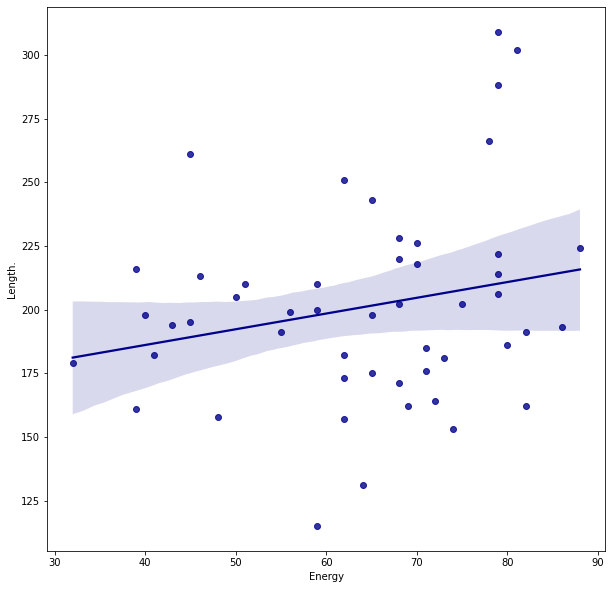

In [52]:
#Relação entre energia e duração da música
fig = plt.subplots(figsize=(10,10))
sns.regplot(x='Energy', y='Length.', data=df, color='darkblue')

In [48]:
#Ainda não sei o que fazer com essas listas!
danceability = df['Danceability'].values.tolist()
print(danceability)

[76, 79, 40, 64, 58, 80, 75, 48, 88, 70, 61, 82, 50, 73, 83, 70, 75, 76, 84, 72, 68, 70, 81, 80, 67, 69, 82, 73, 74, 64, 29, 78, 78, 80, 77, 66, 75, 72, 84, 81, 69, 77, 57, 90, 88, 66, 67, 69, 59, 75]


In [49]:
energy = df['Energy'].values.tolist()
print(energy)

[55, 81, 80, 65, 65, 68, 64, 68, 62, 43, 62, 71, 41, 79, 50, 45, 65, 48, 39, 62, 74, 59, 79, 78, 45, 82, 59, 46, 86, 79, 51, 32, 71, 59, 88, 72, 70, 82, 73, 56, 68, 68, 39, 40, 69, 62, 75, 79, 70, 79]


In [50]:
length = df['Length.'].values.tolist()
print(length)

[191, 302, 186, 198, 175, 220, 131, 202, 157, 194, 251, 185, 182, 288, 205, 261, 243, 158, 161, 173, 153, 115, 309, 266, 195, 191, 210, 213, 193, 222, 210, 179, 176, 200, 224, 164, 226, 162, 181, 199, 228, 171, 216, 198, 162, 182, 202, 214, 218, 206]


In [51]:
genres = df['Genre'].values.tolist()
print(genres)

['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap', 'pop', 'trap music', 'pop', 'country rap', 'electropop', 'reggaeton', 'dance pop', 'pop', 'panamanian pop', 'canadian hip hop', 'dance pop', 'latin', 'dfw rap', 'canadian hip hop', 'escape room', 'pop house', 'country rap', 'reggaeton flow', 'latin', 'electropop', 'canadian pop', 'australian pop', 'canadian hip hop', 'latin', 'latin', 'edm', 'dance pop', 'reggaeton', 'atl hip hop', 'dance pop', 'big room', 'panamanian pop', 'pop', 'boy band', 'dance pop', 'edm', 'dance pop', 'dance pop', 'pop', 'r&b en espanol', 'brostep', 'latin', 'brostep', 'edm', 'pop']


In [53]:
df.corr()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Beats.Per.Minute,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553
Popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.087639,-0.034684,0.238553,1.000000


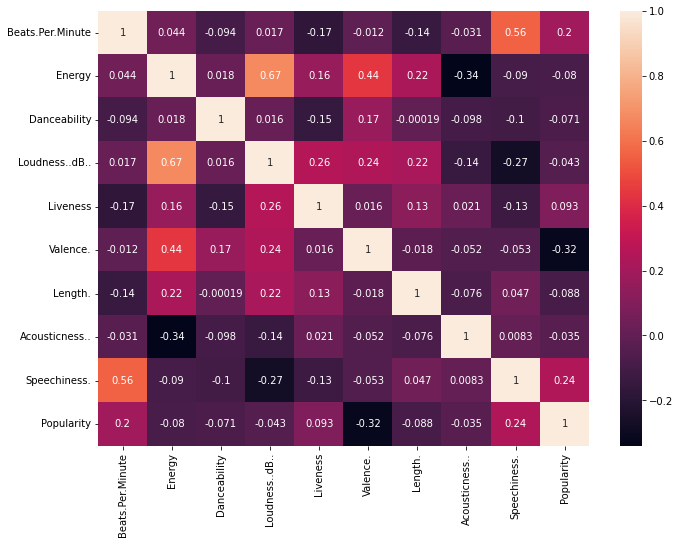

In [54]:
#ver correlações das possíveis features por heatmap
corr = df.corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

In [57]:
# No exercício proposto a intenção é ver qual a variável mais influencia na popularidade de uma música, portanto,
# ordenarei o quadro acima do mais correlacionado ao menos correlacionado a coluna 'Popularity'.
# abs() function is used to return the absolute value of a number, i.e., it will remove the negative sign of the number. 
popularity_corr = df.corr()
print("Ordenação de Correlação")
popularity_corr['Popularity'].sort_values(ascending=False)

Ordenação de Correlação


Popularity          1.000000
Speechiness.        0.238553
Beats.Per.Minute    0.196097
Liveness            0.092564
Acousticness..     -0.034684
Loudness..dB..     -0.043085
Danceability       -0.071413
Energy             -0.080295
Length.            -0.087639
Valence.           -0.317752
Name: Popularity, dtype: float64

In [56]:
# Podemos observar que as colunas 'Speechness', 'Beats.Per.Minute' e 'Liveness' são as 3 com maior correlação com a 'Popularity' de uma faixa.